# Heart Disease Prediction Model - Training & Testing
## Federated Learning Heart Disease Prediction System

This notebook covers:
1. Data Loading and Exploration
2. Data Preprocessing
3. Model Training (Multiple Algorithms)
4. Model Evaluation
5. Model Comparison
6. Model Saving for Production Use

## 1. Import Required Libraries

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Machine Learning - Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc,
    roc_auc_score, matthews_corrcoef
)

# Model persistence
import pickle
import os
from datetime import datetime

print("All libraries imported successfully!")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

All libraries imported successfully!
Analysis Date: 2026-02-26 13:55:57


## 2. Load Dataset

In [3]:
# Load the dataset
data_path = 'media/datasets/MH-HOSP-2024-001_1769405831_Hospital_A.csv'
df = pd.read_csv(data_path)

print("Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape}")
print(f"Total Records: {len(df)}")
print(f"Total Features: {len(df.columns)}")

# Display first few rows
df.head(10)

Dataset loaded successfully!

Dataset Shape: (20000, 12)
Total Records: 20000
Total Features: 12


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,60,M,ASY,184,231,0,Normal,145,Y,4.7,Flat,1
1,23,F,NAP,90,168,0,ST,183,Y,5.6,Flat,1
2,80,M,NAP,100,256,0,Normal,166,Y,0.2,Down,1
3,69,M,TA,195,145,0,ST,70,Y,5.3,Up,1
4,29,M,ATA,105,125,0,LVH,97,Y,3.0,Down,1
5,83,F,TA,190,254,0,LVH,169,Y,2.6,Down,1
6,83,M,NAP,181,132,0,Normal,178,Y,3.5,Flat,1
7,32,F,ASY,98,296,0,ST,183,Y,6.1,Up,1
8,11,M,ASY,97,129,0,ST,124,Y,3.7,Down,1
9,30,F,ATA,114,162,0,ST,175,N,0.7,Up,0


## 3. Data Exploration

In [4]:
# Display dataset information
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
df.info()

print("\n" + "=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)
df.describe()

DATASET INFORMATION
<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             20000 non-null  int64  
 1   Sex             20000 non-null  str    
 2   ChestPainType   20000 non-null  str    
 3   RestingBP       20000 non-null  int64  
 4   Cholesterol     20000 non-null  int64  
 5   FastingBS       20000 non-null  int64  
 6   RestingECG      20000 non-null  str    
 7   MaxHR           20000 non-null  int64  
 8   ExerciseAngina  20000 non-null  str    
 9   Oldpeak         20000 non-null  float64
 10  ST_Slope        20000 non-null  str    
 11  HeartDisease    20000 non-null  int64  
dtypes: float64(1), int64(6), str(5)
memory usage: 1.8 MB

STATISTICAL SUMMARY


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,48.497000,144.447550,234.313750,0.499600,135.576050,3.247300,0.738050
std,23.098759,31.888631,66.525829,0.500012,38.022024,1.877351,0.439707
min,9.000000,90.000000,120.000000,0.000000,70.000000,0.000000,0.000000
25%,28.000000,117.000000,177.000000,0.000000,102.000000,1.600000,0.000000
50%,48.000000,144.000000,233.000000,0.000000,136.000000,3.200000,1.000000
75%,68.000000,172.000000,292.000000,1.000000,168.000000,4.900000,1.000000
max,88.000000,199.000000,349.000000,1.000000,201.000000,6.500000,1.000000


In [5]:
# Check for missing values
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0])

if missing_df['Missing Values'].sum() == 0:
    print("\n✓ No missing values found!")
else:
    print(f"\n⚠ Total missing values: {missing_df['Missing Values'].sum()}")

MISSING VALUES ANALYSIS
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

✓ No missing values found!


TARGET VARIABLE DISTRIBUTION (HeartDisease)

Class 0 (No Disease): 5239 (26.20%)
Class 1 (Disease): 14761 (73.80%)


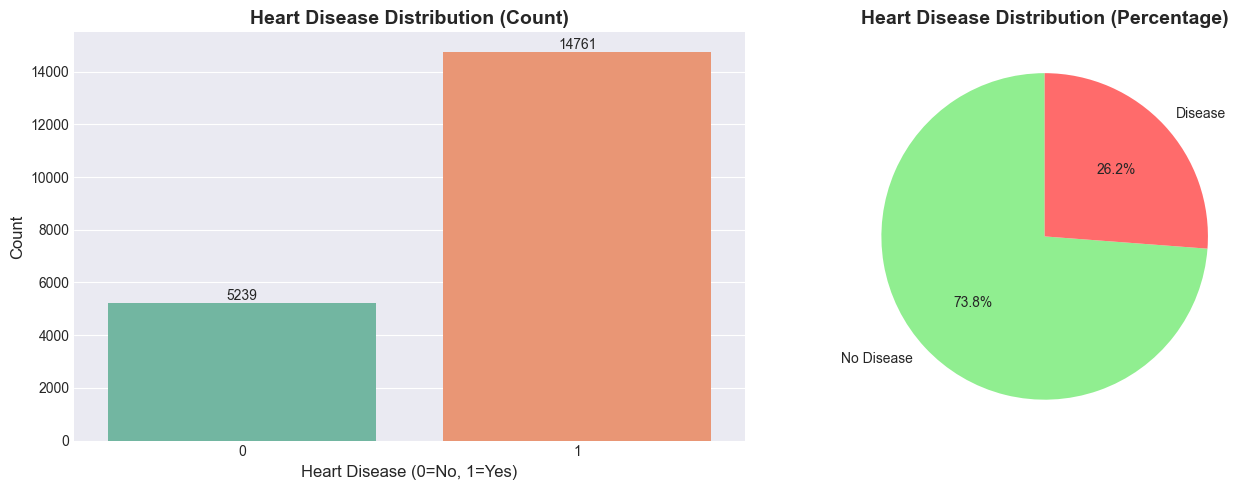


⚠ Dataset may be imbalanced (ratio: 2.82)


In [6]:
# Target variable distribution
print("=" * 80)
print("TARGET VARIABLE DISTRIBUTION (HeartDisease)")
print("=" * 80)

target_counts = df['HeartDisease'].value_counts()
target_percentage = df['HeartDisease'].value_counts(normalize=True) * 100

print(f"\nClass 0 (No Disease): {target_counts[0]} ({target_percentage[0]:.2f}%)")
print(f"Class 1 (Disease): {target_counts[1]} ({target_percentage[1]:.2f}%)")

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='HeartDisease', ax=axes[0], palette='Set2')
axes[0].set_title('Heart Disease Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Heart Disease (0=No, 1=Yes)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Add value labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
axes[1].pie(target_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%',
            startangle=90, colors=['#90EE90', '#FF6B6B'])
axes[1].set_title('Heart Disease Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Check for class imbalance
imbalance_ratio = target_counts[1] / target_counts[0]
if 0.8 <= imbalance_ratio <= 1.2:
    print("\n✓ Dataset is balanced!")
else:
    print(f"\n⚠ Dataset may be imbalanced (ratio: {imbalance_ratio:.2f})")

In [7]:
# Categorical features analysis
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

print("=" * 80)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 80)

for feature in categorical_features:
    print(f"\n{feature}:")
    print(df[feature].value_counts())
    print("-" * 40)

CATEGORICAL FEATURES ANALYSIS

Sex:
Sex
M    10069
F     9931
Name: count, dtype: int64
----------------------------------------

ChestPainType:
ChestPainType
ATA    5108
ASY    5008
NAP    4996
TA     4888
Name: count, dtype: int64
----------------------------------------

RestingECG:
RestingECG
ST        6705
Normal    6680
LVH       6615
Name: count, dtype: int64
----------------------------------------

ExerciseAngina:
ExerciseAngina
N    10103
Y     9897
Name: count, dtype: int64
----------------------------------------

ST_Slope:
ST_Slope
Flat    6702
Down    6691
Up      6607
Name: count, dtype: int64
----------------------------------------


## 4. Data Visualization

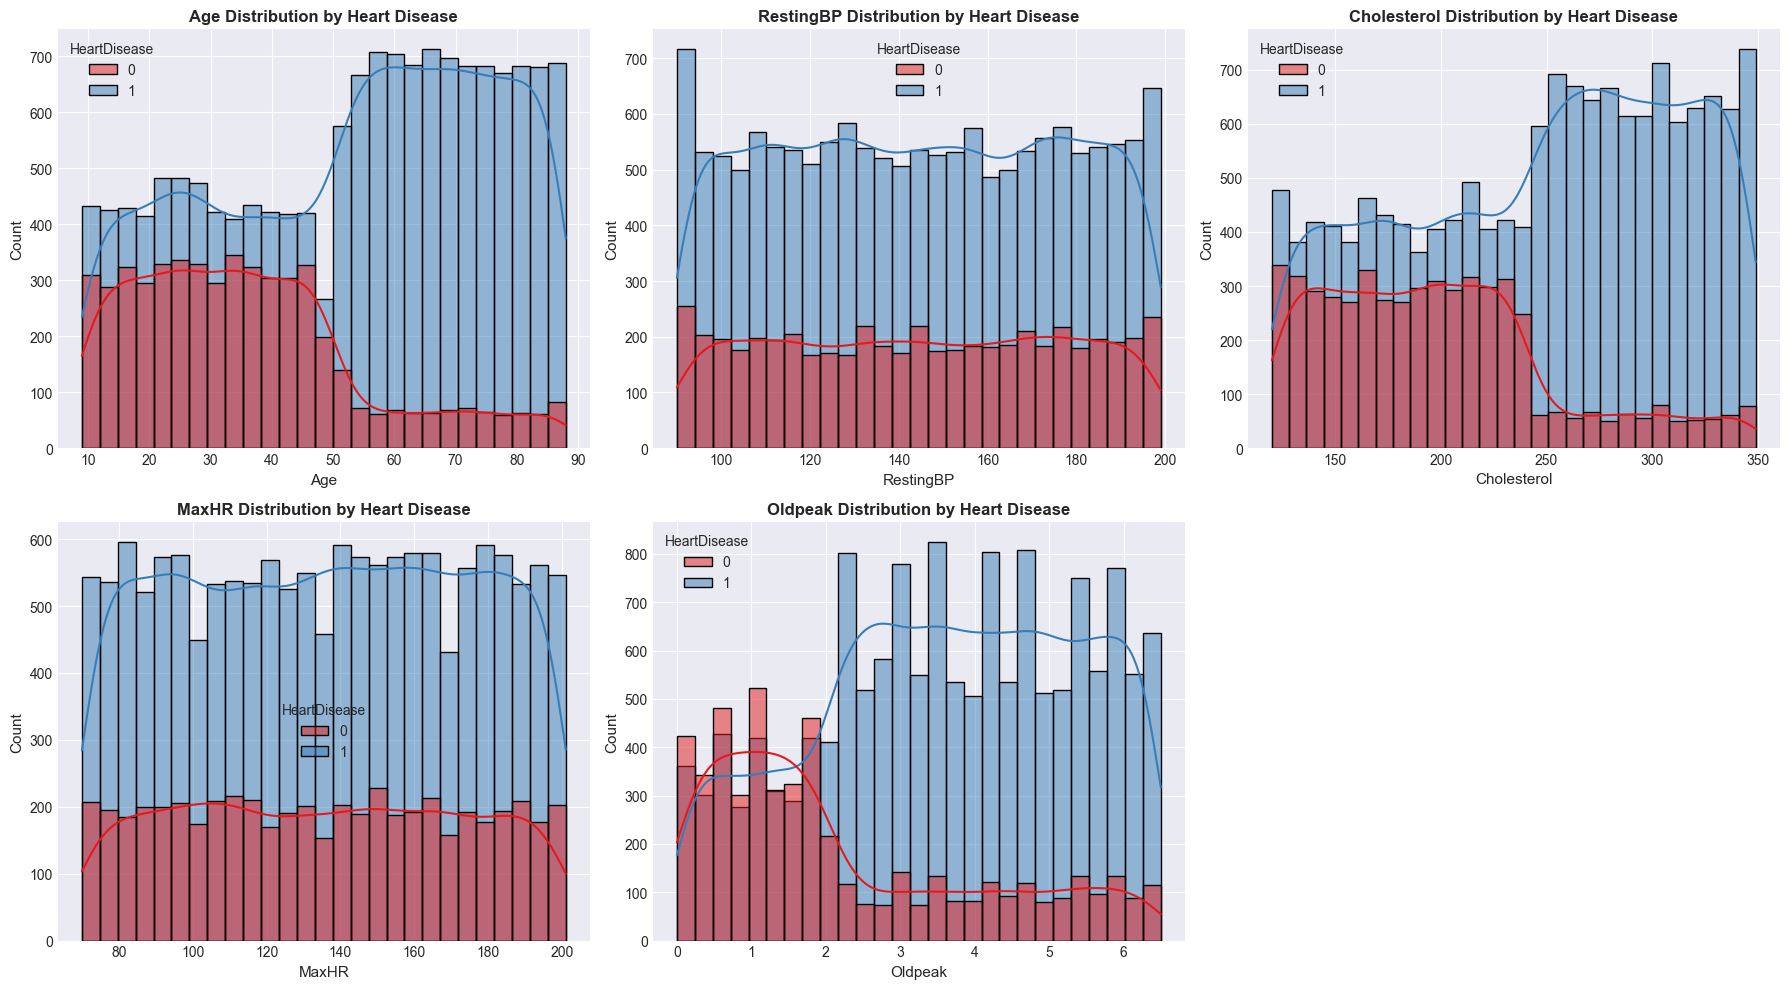

In [8]:
# Numerical features distribution
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, hue='HeartDisease', kde=True, ax=axes[i], palette='Set1')
    axes[i].set_title(f'{feature} Distribution by Heart Disease', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=11)
    axes[i].set_ylabel('Count', fontsize=11)

# Hide the last empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

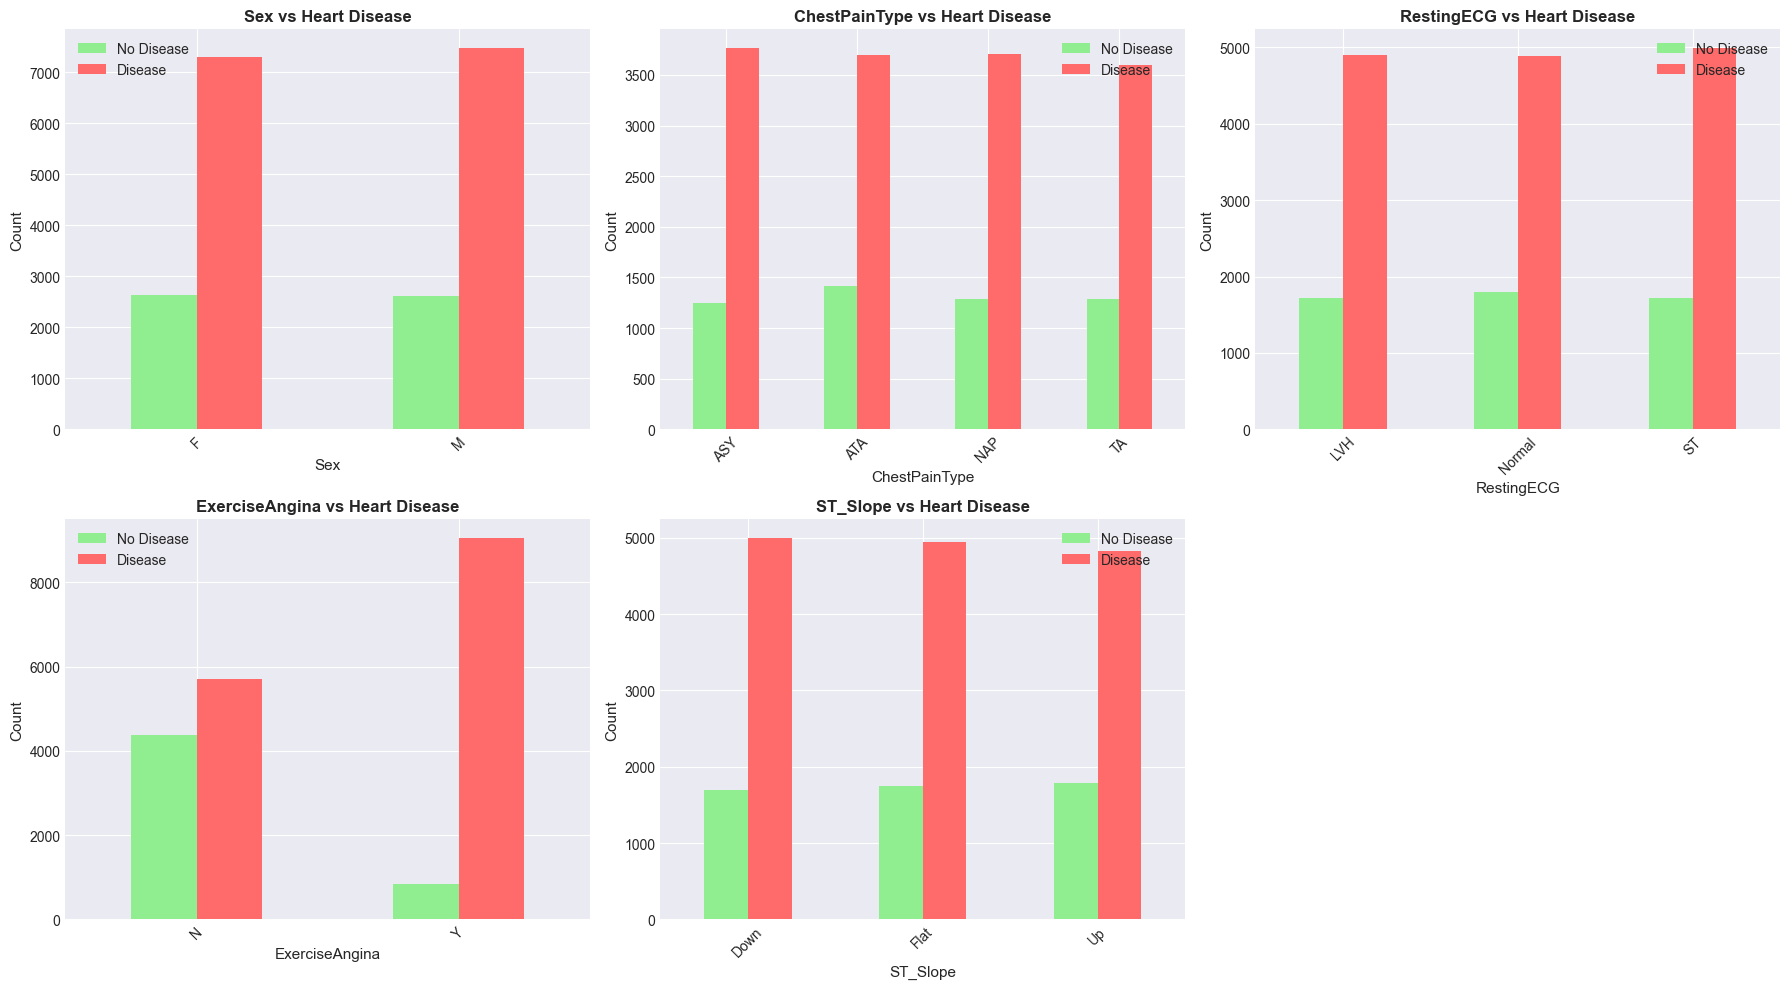

In [9]:
# Categorical features vs Target
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    pd.crosstab(df[feature], df['HeartDisease']).plot(kind='bar', ax=axes[i], color=['#90EE90', '#FF6B6B'])
    axes[i].set_title(f'{feature} vs Heart Disease', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=11)
    axes[i].set_ylabel('Count', fontsize=11)
    axes[i].legend(['No Disease', 'Disease'])
    axes[i].tick_params(axis='x', rotation=45)

# Hide the last empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

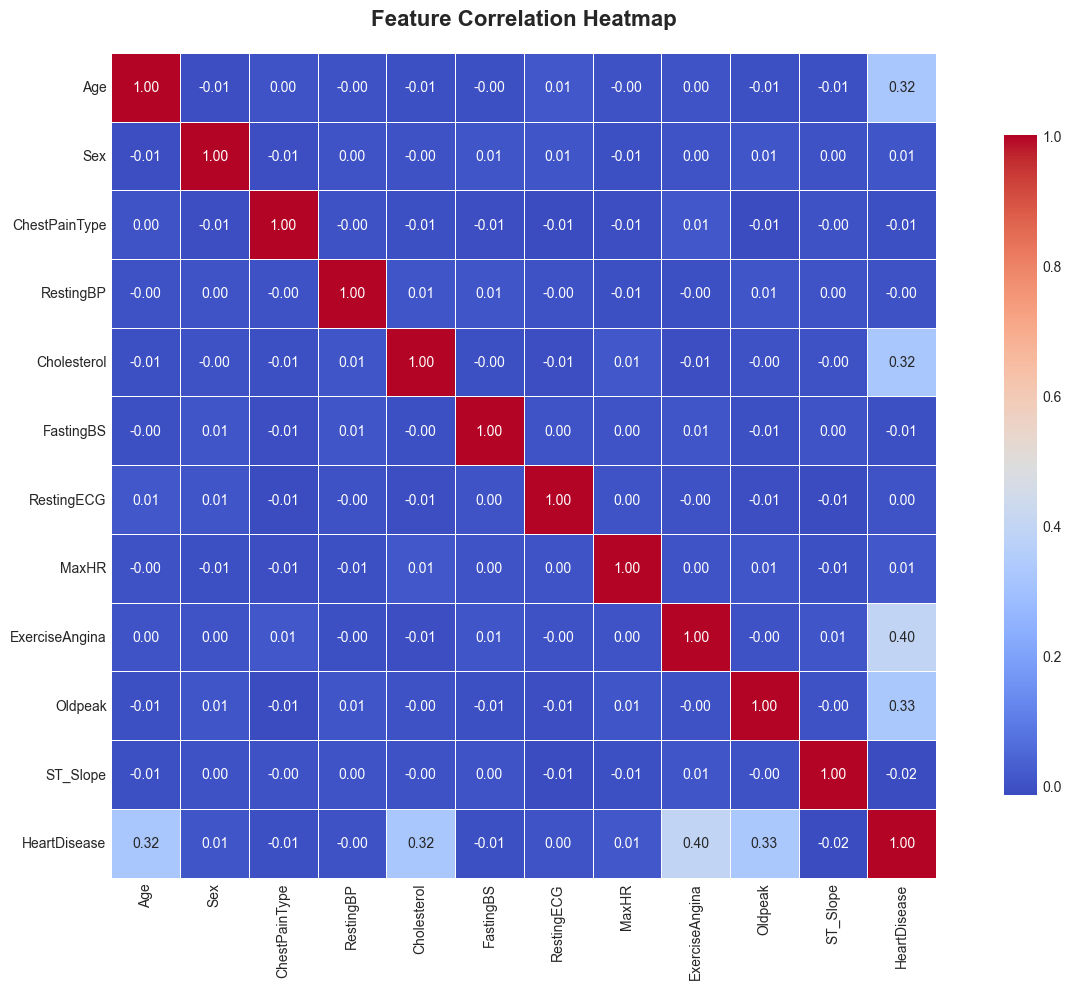


FEATURES CORRELATION WITH TARGET (HeartDisease)
HeartDisease      1.000000
ExerciseAngina    0.396095
Oldpeak           0.327728
Cholesterol       0.324843
Age               0.323428
MaxHR             0.008757
Sex               0.006954
RestingECG        0.003006
RestingBP        -0.000625
FastingBS        -0.005139
ChestPainType    -0.006876
ST_Slope         -0.015202
Name: HeartDisease, dtype: float64


In [10]:
# Correlation heatmap (after encoding)
# Create a copy for correlation analysis
df_corr = df.copy()

# Encode categorical variables for correlation
le = LabelEncoder()
for col in categorical_features:
    df_corr[col] = le.fit_transform(df_corr[col])

# Calculate correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Features most correlated with target
print("\n" + "=" * 80)
print("FEATURES CORRELATION WITH TARGET (HeartDisease)")
print("=" * 80)
target_corr = correlation_matrix['HeartDisease'].sort_values(ascending=False)
print(target_corr)

## 5. Data Preprocessing

In [11]:
# Create a copy for preprocessing
df_processed = df.copy()

print("=" * 80)
print("DATA PREPROCESSING")
print("=" * 80)

# 1. Encode categorical variables
print("\n1. Encoding categorical variables...")

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"   ✓ {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# 2. Handle missing values (if any)
print("\n2. Handling missing values...")
if df_processed.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='median')
    df_processed = pd.DataFrame(imputer.fit_transform(df_processed), columns=df_processed.columns)
    print("   ✓ Missing values imputed")
else:
    print("   ✓ No missing values found")

# 3. Remove outliers in cholesterol (0 values are likely missing)
print("\n3. Handling outliers...")
cholesterol_zero_count = (df_processed['Cholesterol'] == 0).sum()
if cholesterol_zero_count > 0:
    print(f"   ⚠ Found {cholesterol_zero_count} zero cholesterol values")
    # Replace 0 with median
    median_chol = df_processed[df_processed['Cholesterol'] > 0]['Cholesterol'].median()
    df_processed.loc[df_processed['Cholesterol'] == 0, 'Cholesterol'] = median_chol
    print(f"   ✓ Replaced with median value: {median_chol}")
else:
    print("   ✓ No significant outliers in cholesterol")

# Similarly for RestingBP
bp_zero_count = (df_processed['RestingBP'] == 0).sum()
if bp_zero_count > 0:
    print(f"   ⚠ Found {bp_zero_count} zero blood pressure values")
    median_bp = df_processed[df_processed['RestingBP'] > 0]['RestingBP'].median()
    df_processed.loc[df_processed['RestingBP'] == 0, 'RestingBP'] = median_bp
    print(f"   ✓ Replaced with median value: {median_bp}")
else:
    print("   ✓ No significant outliers in blood pressure")

print("\n✓ Data preprocessing completed!")
print(f"\nProcessed dataset shape: {df_processed.shape}")

DATA PREPROCESSING

1. Encoding categorical variables...
   ✓ Sex: {'F': np.int64(0), 'M': np.int64(1)}
   ✓ ChestPainType: {'ASY': np.int64(0), 'ATA': np.int64(1), 'NAP': np.int64(2), 'TA': np.int64(3)}
   ✓ RestingECG: {'LVH': np.int64(0), 'Normal': np.int64(1), 'ST': np.int64(2)}
   ✓ ExerciseAngina: {'N': np.int64(0), 'Y': np.int64(1)}
   ✓ ST_Slope: {'Down': np.int64(0), 'Flat': np.int64(1), 'Up': np.int64(2)}

2. Handling missing values...
   ✓ No missing values found

3. Handling outliers...
   ✓ No significant outliers in cholesterol
   ✓ No significant outliers in blood pressure

✓ Data preprocessing completed!

Processed dataset shape: (20000, 12)


In [12]:
# Separate features and target
X = df_processed.drop('HeartDisease', axis=1)
y = df_processed['HeartDisease']

print("=" * 80)
print("FEATURES AND TARGET SEPARATION")
print("=" * 80)
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {list(X.columns)}")

FEATURES AND TARGET SEPARATION

Features shape: (20000, 11)
Target shape: (20000,)

Features: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("=" * 80)
print("TRAIN-TEST SPLIT")
print("=" * 80)
print(f"\nTraining set size: {X_train.shape[0]} ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} ({(X_test.shape[0]/len(X))*100:.1f}%)")
print(f"\nTraining features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"\nTarget distribution in training set:")
print(y_train.value_counts())
print(f"\nTarget distribution in testing set:")
print(y_test.value_counts())

TRAIN-TEST SPLIT

Training set size: 16000 (80.0%)
Testing set size: 4000 (20.0%)

Training features shape: (16000, 11)
Testing features shape: (4000, 11)

Target distribution in training set:
HeartDisease
1    11809
0     4191
Name: count, dtype: int64

Target distribution in testing set:
HeartDisease
1    2952
0    1048
Name: count, dtype: int64


In [14]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=" * 80)
print("FEATURE SCALING (Standardization)")
print("=" * 80)
print("\n✓ Features scaled using StandardScaler")
print("\nScaled training data statistics:")
print(f"Mean: {X_train_scaled.mean(axis=0).round(4)}")
print(f"Std: {X_train_scaled.std(axis=0).round(4)}")

# Convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

FEATURE SCALING (Standardization)

✓ Features scaled using StandardScaler

Scaled training data statistics:
Mean: [ 0. -0.  0. -0.  0. -0.  0.  0. -0.  0. -0.]
Std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 6. Model Training - Multiple Algorithms

In [17]:
# Define models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

print("=" * 80)
print("MODEL TRAINING")
print("=" * 80)
print(f"\nTraining {len(models)} different models...\n")

# Dictionary to store trained models and results
trained_models = {}
results = []

for name, model in models.items():
    print(f"Training {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'MCC': mcc,
        'CV Mean': cv_mean,
        'CV Std': cv_std
    })
    
    # Store trained model
    trained_models[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Format print statement with proper conditional
    roc_auc_str = f"{roc_auc:.4f}" if roc_auc is not None else 'N/A'
    print(f"   ✓ Accuracy: {accuracy:.4f} | F1: {f1:.4f} | ROC-AUC: {roc_auc_str}\n")

print("\n✓ All models trained successfully!")

MODEL TRAINING

Training 9 different models...

Training Logistic Regression...
   ✓ Accuracy: 0.9030 | F1: 0.9349 | ROC-AUC: 0.9617

Training Decision Tree...
   ✓ Accuracy: 1.0000 | F1: 1.0000 | ROC-AUC: 1.0000

Training Random Forest...
   ✓ Accuracy: 1.0000 | F1: 1.0000 | ROC-AUC: 1.0000

Training Gradient Boosting...
   ✓ Accuracy: 1.0000 | F1: 1.0000 | ROC-AUC: 1.0000

Training XGBoost...
   ✓ Accuracy: 1.0000 | F1: 1.0000 | ROC-AUC: 1.0000

Training SVM...
   ✓ Accuracy: 0.9455 | F1: 0.9634 | ROC-AUC: 0.9867

Training K-Nearest Neighbors...
   ✓ Accuracy: 0.9165 | F1: 0.9442 | ROC-AUC: 0.9657

Training Naive Bayes...
   ✓ Accuracy: 0.8812 | F1: 0.9236 | ROC-AUC: 0.9572

Training AdaBoost...
   ✓ Accuracy: 1.0000 | F1: 1.0000 | ROC-AUC: 1.0000


✓ All models trained successfully!


## 7. Model Evaluation & Comparison

In [18]:
# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("=" * 80)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 80)
print("\n")
print(results_df.to_string(index=False))

# Highlight best model
best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']
print(f"\n\n🏆 BEST MODEL: {best_model_name} (Accuracy: {best_accuracy:.4f})")

MODEL PERFORMANCE COMPARISON


              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC      MCC  CV Mean   CV Std
      Decision Tree   1.00000   1.000000 1.000000  1.000000 1.000000 1.000000 0.999875 0.000250
           AdaBoost   1.00000   1.000000 1.000000  1.000000 1.000000 1.000000 1.000000 0.000000
      Random Forest   1.00000   1.000000 1.000000  1.000000 1.000000 1.000000 0.999938 0.000125
  Gradient Boosting   1.00000   1.000000 1.000000  1.000000 1.000000 1.000000 1.000000 0.000000
            XGBoost   1.00000   1.000000 1.000000  1.000000 1.000000 1.000000 1.000000 0.000000
                SVM   0.94550   0.955667 0.971206  0.963374 0.986668 0.857381 0.940813 0.002134
K-Nearest Neighbors   0.91650   0.931728 0.956978  0.944184 0.965734 0.779724 0.918812 0.004526
Logistic Regression   0.90300   0.925914 0.944106  0.934921 0.961693 0.745152 0.902500 0.004415
        Naive Bayes   0.88125   0.879326 0.972561  0.923597 0.957222 0.677395 0.883813 0.003195


🏆 BEST 

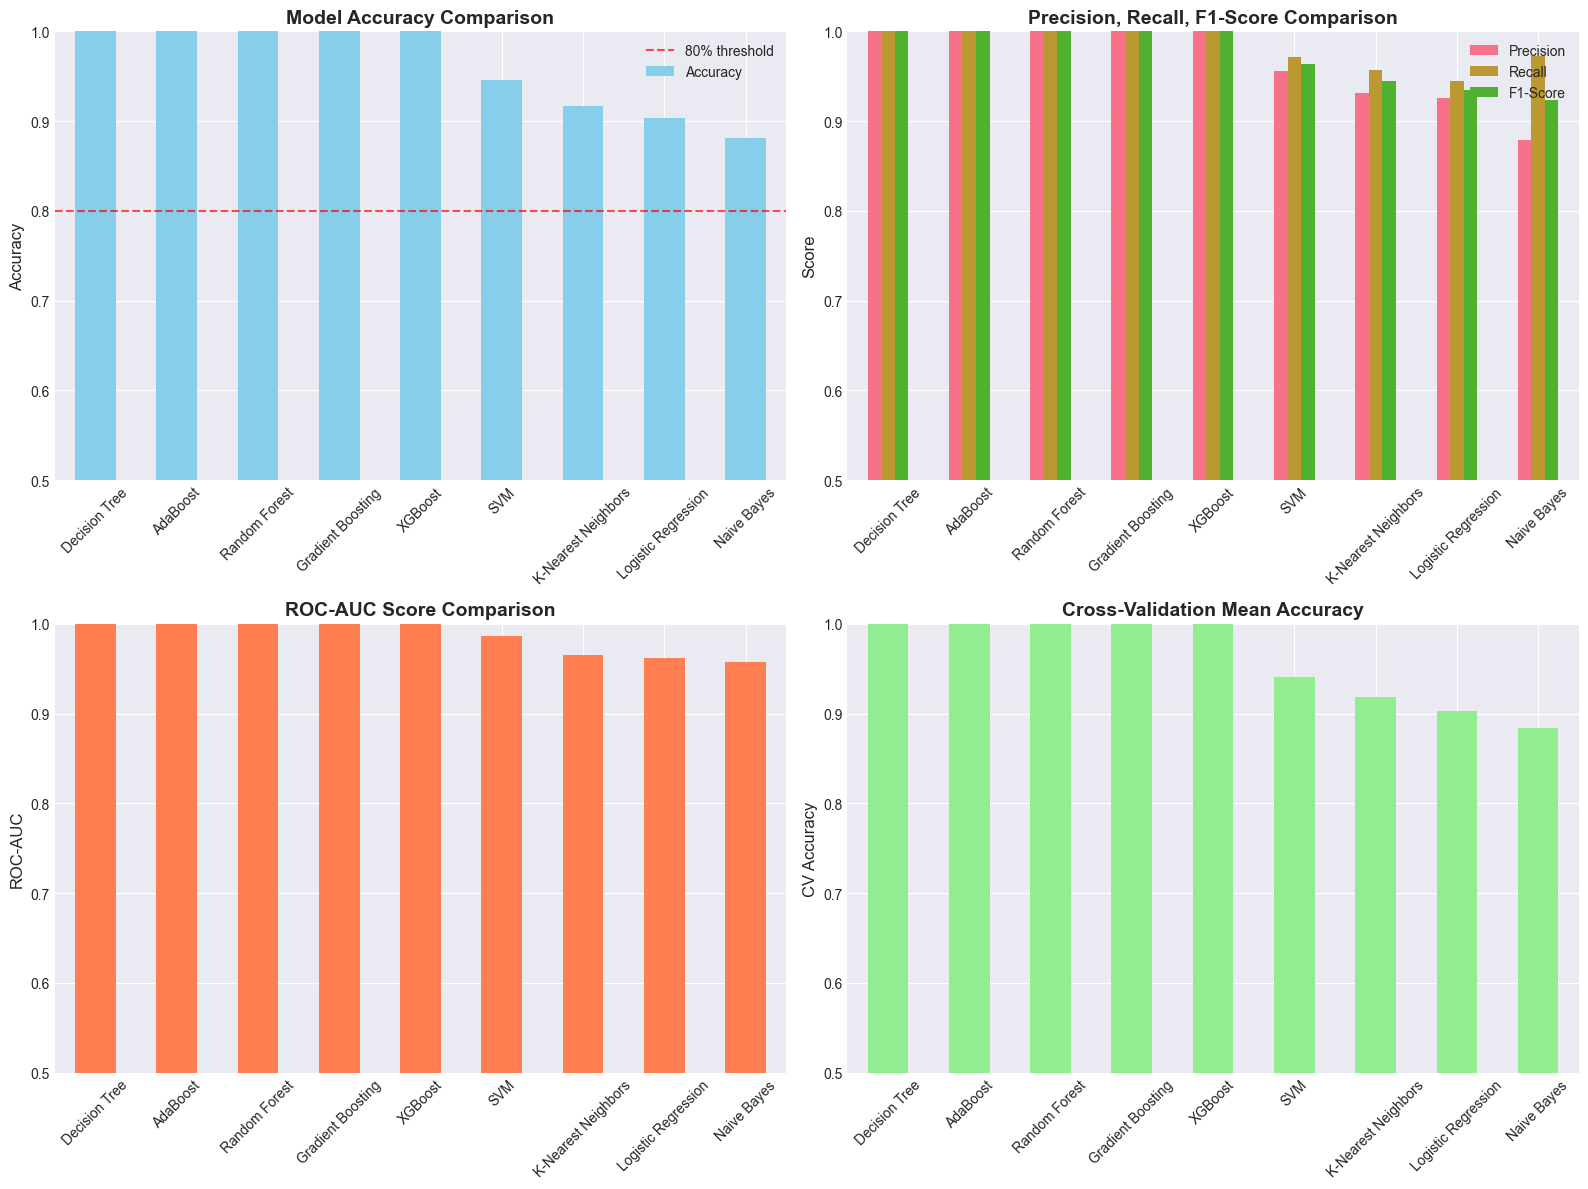

In [19]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy Comparison
results_df.plot(x='Model', y='Accuracy', kind='bar', ax=axes[0, 0], color='skyblue', legend=False)
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylim([0.5, 1.0])
axes[0, 0].axhline(y=0.8, color='r', linestyle='--', alpha=0.7, label='80% threshold')
axes[0, 0].legend()

# 2. Precision, Recall, F1 Comparison
results_df.plot(x='Model', y=['Precision', 'Recall', 'F1-Score'], kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Precision, Recall, F1-Score Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Score', fontsize=12)
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylim([0.5, 1.0])
axes[0, 1].legend()

# 3. ROC-AUC Comparison
roc_data = results_df[results_df['ROC-AUC'].notna()]
roc_data.plot(x='Model', y='ROC-AUC', kind='bar', ax=axes[1, 0], color='coral', legend=False)
axes[1, 0].set_title('ROC-AUC Score Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('ROC-AUC', fontsize=12)
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_ylim([0.5, 1.0])

# 4. Cross-Validation Scores
results_df.plot(x='Model', y='CV Mean', kind='bar', ax=axes[1, 1], 
                color='lightgreen', legend=False, yerr=results_df['CV Std'])
axes[1, 1].set_title('Cross-Validation Mean Accuracy', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('CV Accuracy', fontsize=12)
axes[1, 1].set_xlabel('')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_ylim([0.5, 1.0])

plt.tight_layout()
plt.show()

## 8. Detailed Evaluation - Best Model

In [20]:
# Get best model details
best_model_info = trained_models[best_model_name]
best_model = best_model_info['model']
y_pred_best = best_model_info['y_pred']
y_pred_proba_best = best_model_info['y_pred_proba']

print("=" * 80)
print(f"DETAILED EVALUATION - {best_model_name}")
print("=" * 80)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=['No Disease', 'Disease']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix:")
print(cm)
print(f"\nTrue Negatives: {cm[0][0]}")
print(f"False Positives: {cm[0][1]}")
print(f"False Negatives: {cm[1][0]}")
print(f"True Positives: {cm[1][1]}")

DETAILED EVALUATION - Decision Tree

Classification Report:
              precision    recall  f1-score   support

  No Disease       1.00      1.00      1.00      1048
     Disease       1.00      1.00      1.00      2952

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


Confusion Matrix:
[[1048    0]
 [   0 2952]]

True Negatives: 1048
False Positives: 0
False Negatives: 0
True Positives: 2952


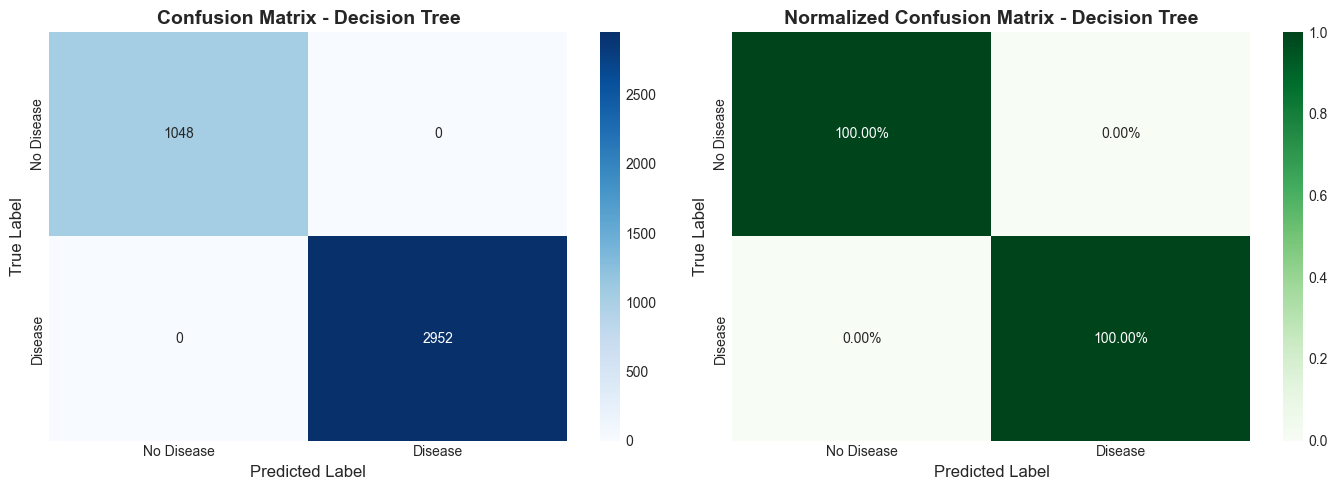

In [21]:
# Visualize Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
axes[0].set_title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens', ax=axes[1],
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
axes[1].set_title(f'Normalized Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

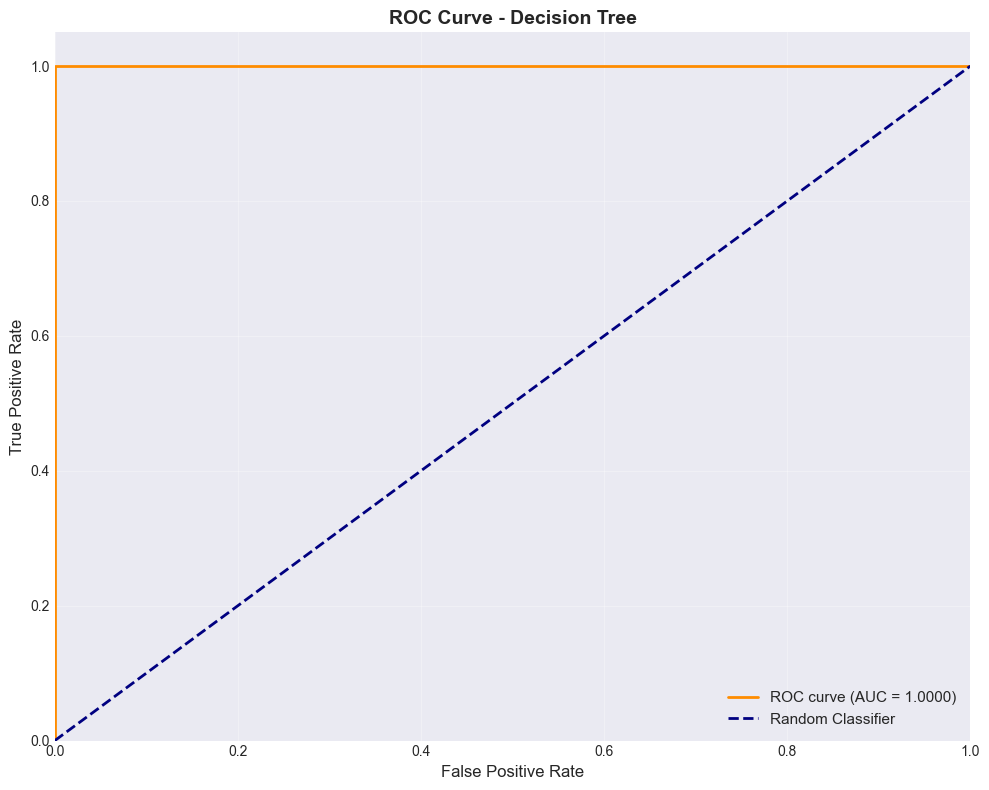

In [22]:
# ROC Curve for best model
if y_pred_proba_best is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve - {best_model_name}', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right", fontsize=11)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

FEATURE IMPORTANCE - Decision Tree

        Feature  Importance
   Cholesterol    0.327779
           Age    0.323134
ExerciseAngina    0.178969
       Oldpeak    0.170118
           Sex    0.000000
 ChestPainType    0.000000
     RestingBP    0.000000
    RestingECG    0.000000
     FastingBS    0.000000
         MaxHR    0.000000
      ST_Slope    0.000000


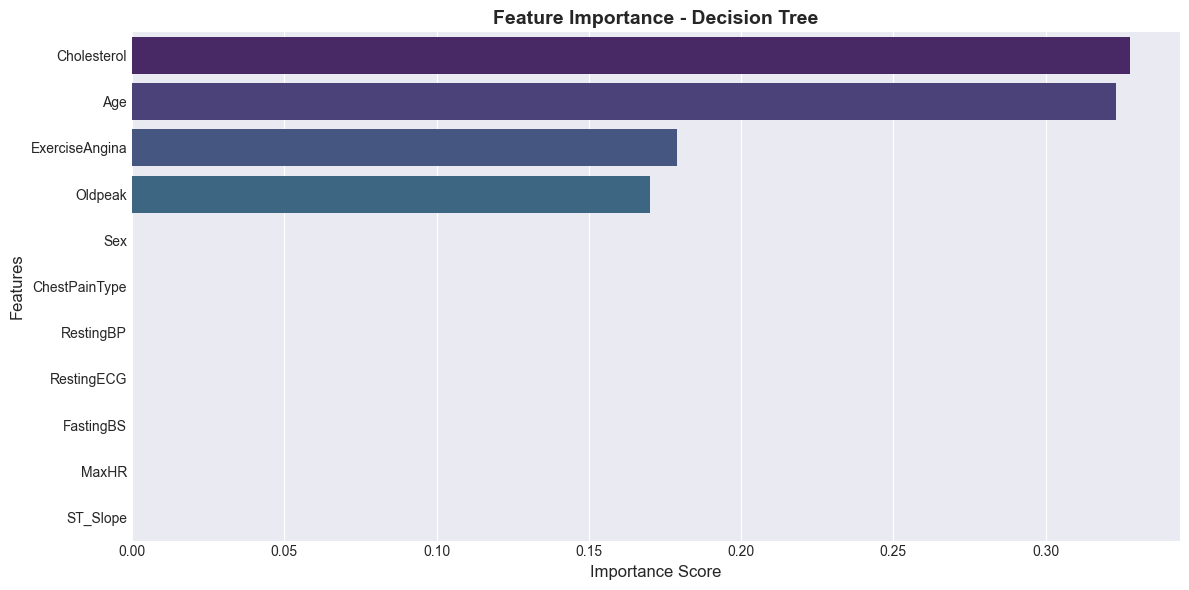

In [23]:
# Feature Importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("=" * 80)
    print(f"FEATURE IMPORTANCE - {best_model_name}")
    print("=" * 80)
    print("\n", feature_importance.to_string(index=False))
    
    # Visualize Feature Importance
    plt.figure(figsize=(12, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print(f"\n⚠ {best_model_name} does not support feature importance visualization")

## 9. Hyperparameter Tuning - Best Model

In [24]:
print("=" * 80)
print(f"HYPERPARAMETER TUNING - {best_model_name}")
print("=" * 80)
print("\nPerforming Grid Search for optimal hyperparameters...\n")

# Define parameter grid based on best model
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 0.9, 1.0]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    }
elif best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01],
        'kernel': ['rbf', 'linear']
    }
else:
    print(f"⚠ No predefined hyperparameter grid for {best_model_name}")
    print("Using default parameters...")
    param_grid = {}

if param_grid:
    # Perform Grid Search
    grid_search = GridSearchCV(
        best_model, param_grid, cv=5, scoring='accuracy', 
        n_jobs=-1, verbose=1
    )
    grid_search.fit(X_train_scaled, y_train)
    
    # Best parameters
    print("\n" + "=" * 80)
    print("GRID SEARCH RESULTS")
    print("=" * 80)
    print(f"\nBest Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
    
    # Use tuned model
    tuned_model = grid_search.best_estimator_
    y_pred_tuned = tuned_model.predict(X_test_scaled)
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    
    print(f"\nTuned Model Test Accuracy: {accuracy_tuned:.4f}")
    print(f"Original Model Test Accuracy: {best_accuracy:.4f}")
    print(f"Improvement: {(accuracy_tuned - best_accuracy):.4f}")
    
    # Update best model if tuned is better
    if accuracy_tuned > best_accuracy:
        best_model = tuned_model
        print("\n✓ Using tuned model for final deployment")
    else:
        print("\n✓ Original model performs better, keeping original")
else:
    print("\n✓ Using trained model without hyperparameter tuning")

HYPERPARAMETER TUNING - Decision Tree

Performing Grid Search for optimal hyperparameters...

⚠ No predefined hyperparameter grid for Decision Tree
Using default parameters...

✓ Using trained model without hyperparameter tuning


## 10. Model Saving for Production

In [25]:
# Create ml_models directory if it doesn't exist
model_dir = 'ml_models'
os.makedirs(model_dir, exist_ok=True)

print("=" * 80)
print("SAVING MODELS FOR PRODUCTION")
print("=" * 80)

# Save best model
model_path = os.path.join(model_dir, 'heart_disease_model.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(best_model, f)
print(f"\n✓ Best model saved: {model_path}")
print(f"   Model: {best_model_name}")

# Save scaler
scaler_path = os.path.join(model_dir, 'scaler.pkl')
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"\n✓ Scaler saved: {scaler_path}")

# Save label encoders
encoders_path = os.path.join(model_dir, 'label_encoders.pkl')
with open(encoders_path, 'wb') as f:
    pickle.dump(label_encoders, f)
print(f"\n✓ Label encoders saved: {encoders_path}")

# Save feature names
feature_names_path = os.path.join(model_dir, 'feature_names.pkl')
with open(feature_names_path, 'wb') as f:
    pickle.dump(list(X.columns), f)
print(f"\n✓ Feature names saved: {feature_names_path}")

# Save model metadata
metadata = {
    'model_name': best_model_name,
    'accuracy': best_accuracy,
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'training_samples': len(X_train),
    'test_samples': len(X_test),
    'features': list(X.columns),
    'target_classes': ['No Disease', 'Disease']
}

metadata_path = os.path.join(model_dir, 'model_metadata.pkl')
with open(metadata_path, 'wb') as f:
    pickle.dump(metadata, f)
print(f"\n✓ Model metadata saved: {metadata_path}")

print("\n" + "=" * 80)
print("✓ ALL MODELS AND ARTIFACTS SAVED SUCCESSFULLY!")
print("=" * 80)
print("\nThese files can now be used in the Django application for predictions.")

SAVING MODELS FOR PRODUCTION

✓ Best model saved: ml_models\heart_disease_model.pkl
   Model: Decision Tree

✓ Scaler saved: ml_models\scaler.pkl

✓ Label encoders saved: ml_models\label_encoders.pkl

✓ Feature names saved: ml_models\feature_names.pkl

✓ Model metadata saved: ml_models\model_metadata.pkl

✓ ALL MODELS AND ARTIFACTS SAVED SUCCESSFULLY!

These files can now be used in the Django application for predictions.


## 11. Model Testing - Sample Predictions

In [26]:
print("=" * 80)
print("SAMPLE PREDICTIONS")
print("=" * 80)

# Test with a few samples
n_samples = 5
sample_indices = np.random.choice(X_test.index, n_samples, replace=False)

print(f"\nMaking predictions on {n_samples} random test samples...\n")

for i, idx in enumerate(sample_indices, 1):
    # Get sample
    sample = X_test.loc[idx].values.reshape(1, -1)
    sample_scaled = scaler.transform(sample)
    
    # Make prediction
    prediction = best_model.predict(sample_scaled)[0]
    probability = best_model.predict_proba(sample_scaled)[0] if hasattr(best_model, 'predict_proba') else None
    
    # Get actual value
    actual = y_test.loc[idx]
    
    print(f"Sample {i}:")
    print(f"   Features: {dict(zip(X.columns, X_test.loc[idx].values))}")
    print(f"   Actual: {'Disease' if actual == 1 else 'No Disease'}")
    print(f"   Predicted: {'Disease' if prediction == 1 else 'No Disease'}")
    if probability is not None:
        print(f"   Probability: {probability[1]*100:.2f}% (Disease)")
    print(f"   Result: {'✓ CORRECT' if prediction == actual else '✗ INCORRECT'}")
    print("-" * 80)

SAMPLE PREDICTIONS

Making predictions on 5 random test samples...

Sample 1:
   Features: {'Age': np.float64(65.0), 'Sex': np.float64(1.0), 'ChestPainType': np.float64(3.0), 'RestingBP': np.float64(170.0), 'Cholesterol': np.float64(253.0), 'FastingBS': np.float64(1.0), 'RestingECG': np.float64(0.0), 'MaxHR': np.float64(182.0), 'ExerciseAngina': np.float64(1.0), 'Oldpeak': np.float64(3.5), 'ST_Slope': np.float64(1.0)}
   Actual: Disease
   Predicted: Disease
   Probability: 100.00% (Disease)
   Result: ✓ CORRECT
--------------------------------------------------------------------------------
Sample 2:
   Features: {'Age': np.float64(13.0), 'Sex': np.float64(1.0), 'ChestPainType': np.float64(3.0), 'RestingBP': np.float64(196.0), 'Cholesterol': np.float64(174.0), 'FastingBS': np.float64(0.0), 'RestingECG': np.float64(0.0), 'MaxHR': np.float64(139.0), 'ExerciseAngina': np.float64(1.0), 'Oldpeak': np.float64(2.9), 'ST_Slope': np.float64(1.0)}
   Actual: Disease
   Predicted: Disease
   Pro

## 12. Summary Report

In [27]:
print("=" * 80)
print("FINAL SUMMARY REPORT")
print("=" * 80)
print(f"\nAnalysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"\nDataset: {data_path}")
print(f"Total Samples: {len(df)}")
print(f"Total Features: {len(X.columns)}")
print(f"\nTraining Set Size: {len(X_train)} samples")
print(f"Testing Set Size: {len(X_test)} samples")
print(f"\nModels Trained: {len(models)}")
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   • Accuracy: {best_accuracy:.4f}")
print(f"   • Precision: {results_df.iloc[0]['Precision']:.4f}")
print(f"   • Recall: {results_df.iloc[0]['Recall']:.4f}")
print(f"   • F1-Score: {results_df.iloc[0]['F1-Score']:.4f}")
if results_df.iloc[0]['ROC-AUC']:
    print(f"   • ROC-AUC: {results_df.iloc[0]['ROC-AUC']:.4f}")
print(f"   • MCC: {results_df.iloc[0]['MCC']:.4f}")
print(f"\nModel Artifacts Saved:")
print(f"   ✓ {model_path}")
print(f"   ✓ {scaler_path}")
print(f"   ✓ {encoders_path}")
print(f"   ✓ {feature_names_path}")
print(f"   ✓ {metadata_path}")
print("\n" + "=" * 80)
print("✓ MODEL TRAINING AND EVALUATION COMPLETED SUCCESSFULLY!")
print("=" * 80)
print("\nNext Steps:")
print("1. Review the model performance metrics above")
print("2. If satisfied, the model files are ready for production use")
print("3. Integrate the saved model with the Django application")
print("4. Test predictions through the web interface")
print("5. Monitor model performance in production")
print("\nNote: Model files are saved in the 'ml_models' directory")

FINAL SUMMARY REPORT

Analysis Date: 2026-02-26 14:08:47

Dataset: media/datasets/MH-HOSP-2024-001_1769405831_Hospital_A.csv
Total Samples: 20000
Total Features: 11

Training Set Size: 16000 samples
Testing Set Size: 4000 samples

Models Trained: 9

🏆 Best Model: Decision Tree
   • Accuracy: 1.0000
   • Precision: 1.0000
   • Recall: 1.0000
   • F1-Score: 1.0000
   • ROC-AUC: 1.0000
   • MCC: 1.0000

Model Artifacts Saved:
   ✓ ml_models\heart_disease_model.pkl
   ✓ ml_models\scaler.pkl
   ✓ ml_models\label_encoders.pkl
   ✓ ml_models\feature_names.pkl
   ✓ ml_models\model_metadata.pkl

✓ MODEL TRAINING AND EVALUATION COMPLETED SUCCESSFULLY!

Next Steps:
1. Review the model performance metrics above
2. If satisfied, the model files are ready for production use
3. Integrate the saved model with the Django application
4. Test predictions through the web interface
5. Monitor model performance in production

Note: Model files are saved in the 'ml_models' directory
